--Import Libraries

# **🎥📺 NETFLIX MOVIE DATASET ANALYSIS 📽**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('mymoviesdb.csv', lineterminator='\n')
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
#viewing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
#exploring genres column
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
# check for duplicated rows
df.duplicated().sum()

np.int64(0)

In [7]:
# exploring summary statistics
df.describe()


,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


**Exploration Summary**

- We have a dataframe consisting of 9827 rows and 9 columns
- Our dataset looks a bit tidy with no Nans nor duplicated values.
- Release_Date column needs to be casted into date time and to extract only the year values.
- Overview, Original_Language and Poster-Url wouldn't be so useful during analysis, so we'll be drop them.
- There is noticeable outliers in Popularity column
- Vote_Average better be categorised for proper analysis.
- Genre column has comma seperated values and white spaces that needs to be handled and casted into category.Exploration Summary.

In [8]:
# Data Cleaning

Casting Release_Date column and extracing year values

In [9]:
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [10]:
# casting column a
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
# confirming changes
print(df['Release_Date'].dtypes)


datetime64[ns]


In [11]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes


dtype('int32')

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


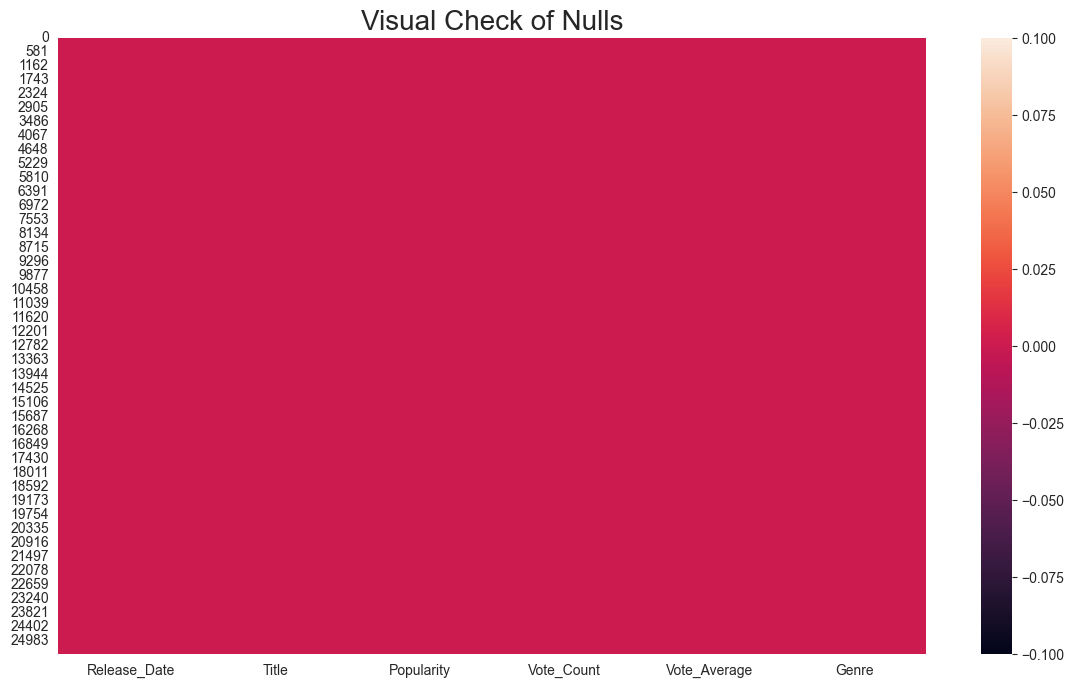

In [77]:
plt.figure(figsize=(14,8))
sns.heatmap(df.isnull())
plt.title('Visual Check of Nulls',fontsize=20)
plt.show()


In [13]:
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# **Dropping Overview, Original_Language and Poster-Url


In [14]:
# making list of column to be dropped
cols = ['Overview', 'Original_Language', 'Poster_Url']
# dropping columns and confirming changes
df.drop(cols, axis = 1, inplace = True)
df.columns


Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [15]:
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


**Categorizing Vote_Average column
We would cut the Vote_Average values and make 4 categories: popular average
below_avg not_popular to describe it more using categorize_col() function
provided above.


In [16]:
def categorize_col (df, col, labels):

 # setting the edges to cut the column accordingly
 edges = [df[col].describe()['min'],
          df[col].describe()['25%'],
          df[col].describe()['50%'],
          df[col].describe()['75%'],
          df[col].describe()['max']]


 df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
 return df




In [17]:
# define labels for edges
labels = ['not_popular', 'below_avg', 'average', 'popular']
# categorize column based on labels and edges
categorize_col(df, 'Vote_Average', labels)
# confirming changes
df['Vote_Average'].unique()


['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [18]:
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [19]:
# exploring column
df['Vote_Average'].value_counts()


Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [20]:
# dropping NaNs
df.dropna(inplace = True)
# confirming
df.isna().sum()


Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [21]:
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


# **we'd split genres into a list and then explode our dataframe to have only one genre per row for each movie**

In [22]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')
# explode the lists
df = df.explode('Genre').reset_index(drop=True)
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [23]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')
# confirming changes
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [25]:
df.nunique()


Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

Now that our dataset is clean and tidy, we are left with a total of 6 columns and 25551
rows to dig into during our analysis


# **Data Visualization**
Here, we'd use Matplotlib and seaborn for making some informative visuals to gain insights abut our data.

In [26]:
# setting up seaborn configurations
sns.set_style('whitegrid')


**Univariate Analysis**

 **The most frequent genre in the dataset**

In [27]:
# showing stats. on genre column
df['Genre'].describe()


count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

# **Genre Distribution - Bar chart and Pie chart**

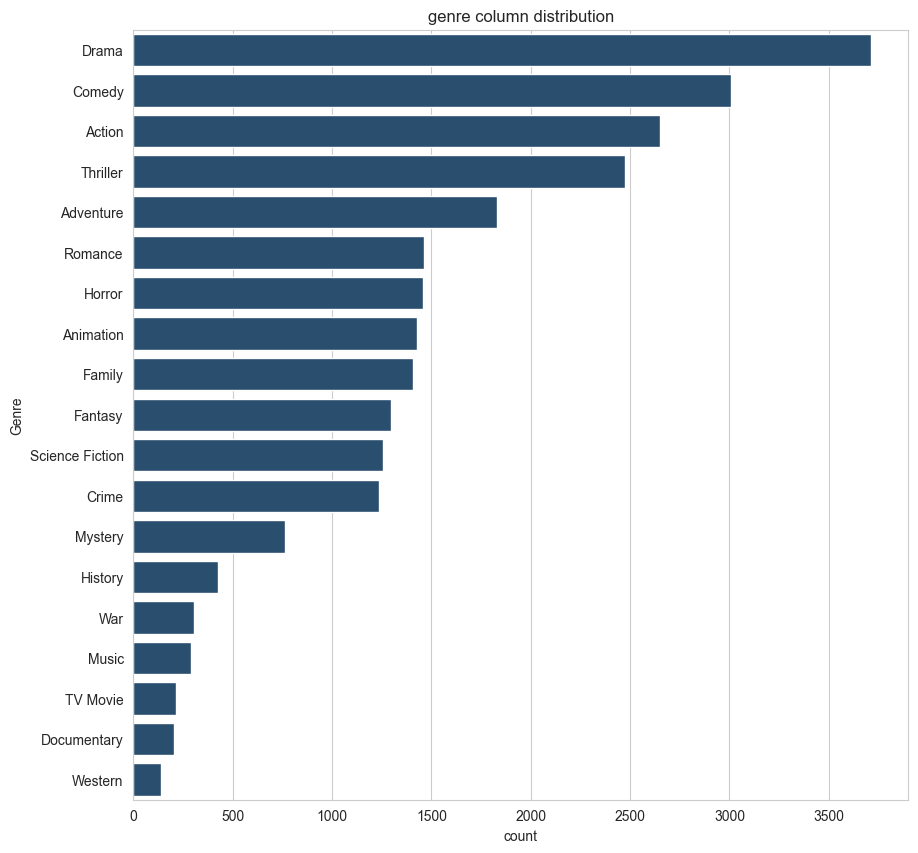

In [76]:


plt.figure(figsize=(10, 10))
sns.countplot(y=df['Genre'], order=df['Genre'].value_counts().index, color='#1f4e79')
plt.title('genre column distribution')
plt.show()

- We can notice from the above visual that Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.


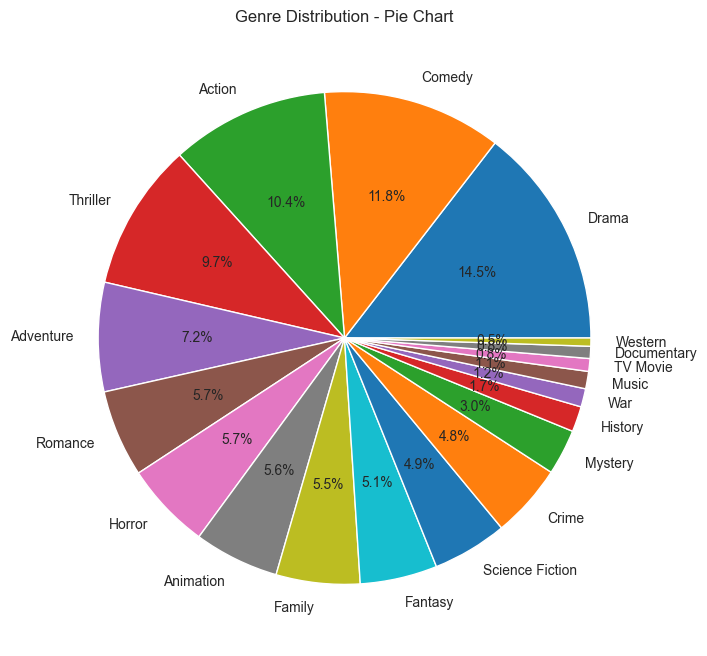

In [33]:
plt.figure(figsize=(8,8))
df['Genre'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Genre Distribution - Pie Chart')
plt.ylabel('')
plt.show()

**b) Yearly Production Trends - Histogram and Line chart**

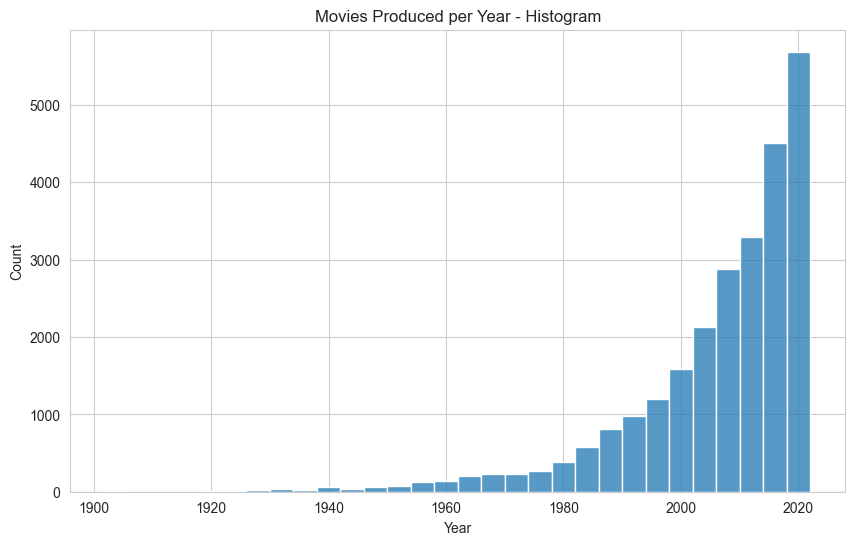

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(df['Release_Date'], bins=30, kde=False)
plt.title('Movies Produced per Year - Histogram')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

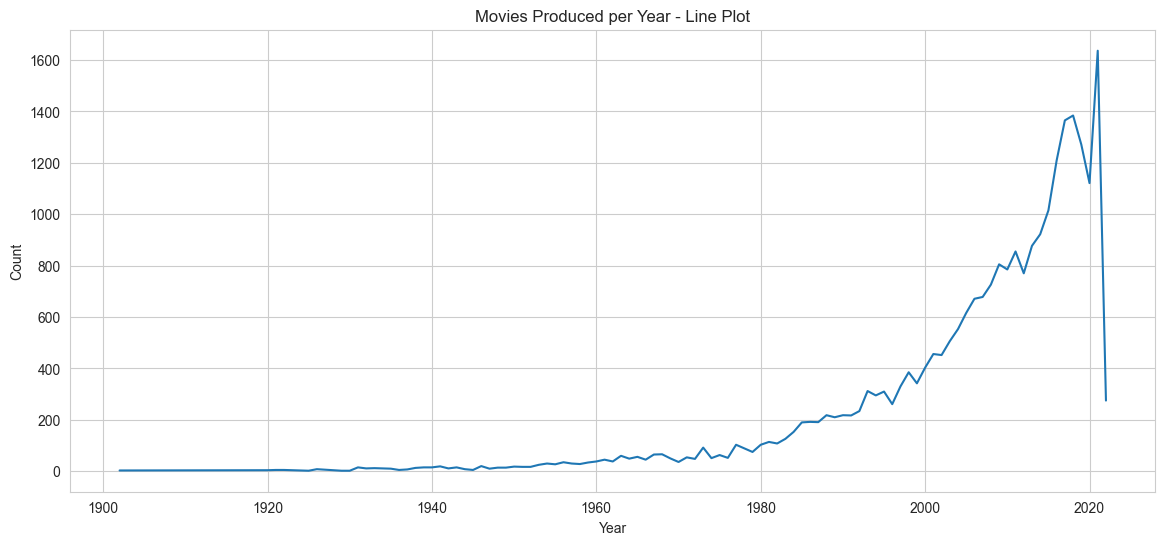

In [38]:
year_counts = df['Release_Date'].value_counts().sort_index()
plt.figure(figsize=(14,6))
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.title('Movies Produced per Year - Line Plot')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# **Popularity, Vote Count, Vote Average**

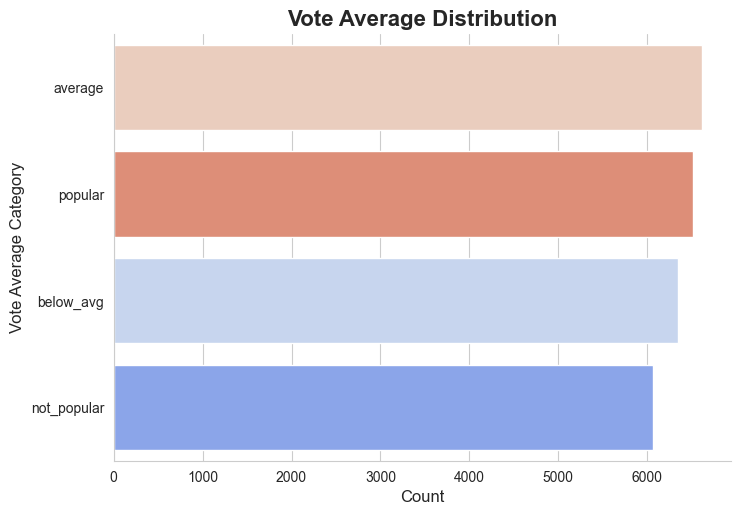

In [45]:
# visualizing vote_average column
#sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
 #order = df['Vote_Average'].value_counts().index,
 #color = '#4287f5')
#plt.title('votes Distribution')
#plt.show()


# Set the style
sns.set_style('whitegrid')

# Create the count plot with a professional and eye-catching palette
sns.catplot(
    y='Vote_Average',
    data=df,
    kind='count',
    hue='Vote_Average',
    order=df['Vote_Average'].value_counts().index,
    palette='coolwarm',  # Professional dual-tone color palette
    height=5,
    aspect=1.5,
    legend=False  # Hide legend since hue and y are the same
)

# Add titles and labels with enhanced font sizes
plt.title('Vote Average Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Vote Average Category', fontsize=12)

# Show the plot
plt.show()


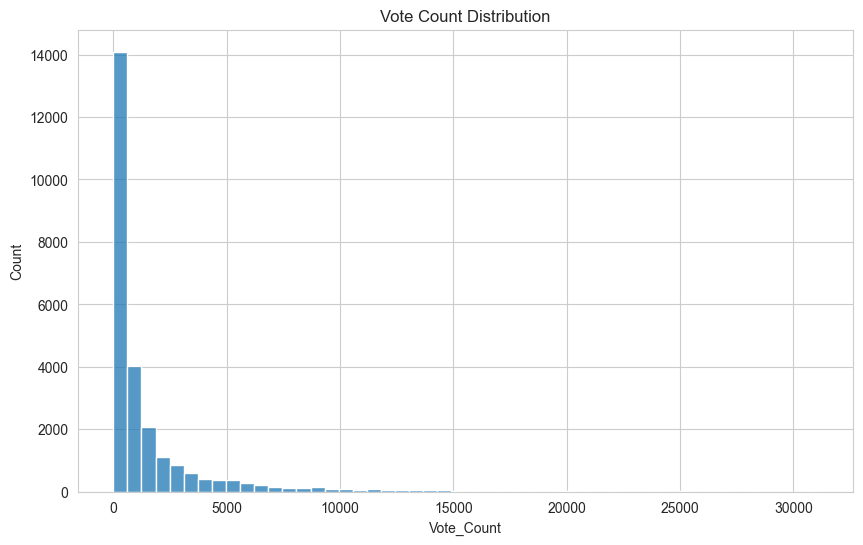

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(df['Vote_Count'], bins=50)
plt.title('Vote Count Distribution')
plt.show()

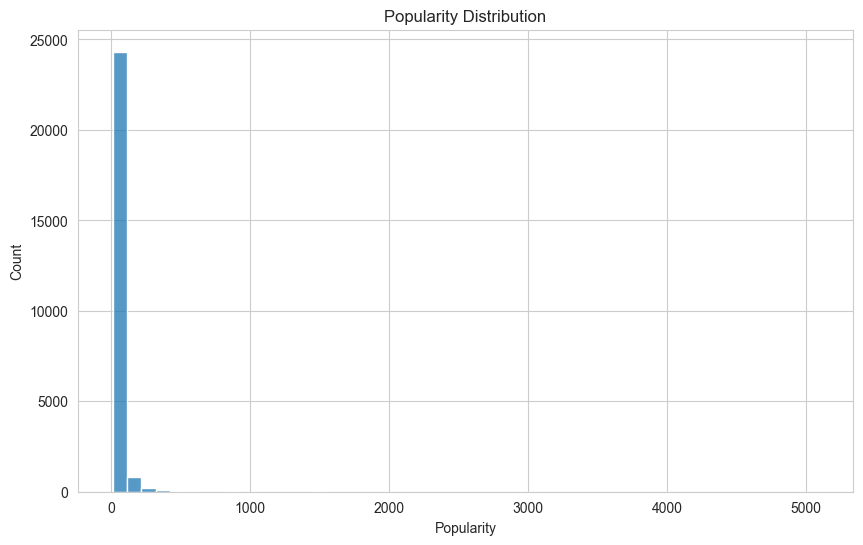

In [47]:
plt.figure(figsize=(10,6))
sns.histplot(df['Popularity'], bins=50)
plt.title('Popularity Distribution')
plt.show()

# **2. Bivariate Analysis**

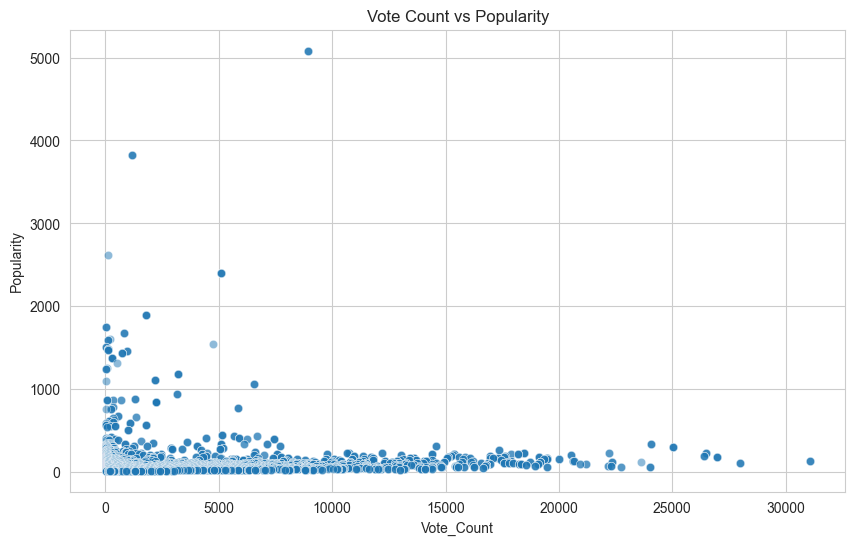

In [49]:
# a) Votes vs Popularity - Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Vote_Count', y='Popularity', alpha=0.5)
plt.title('Vote Count vs Popularity')
plt.show()

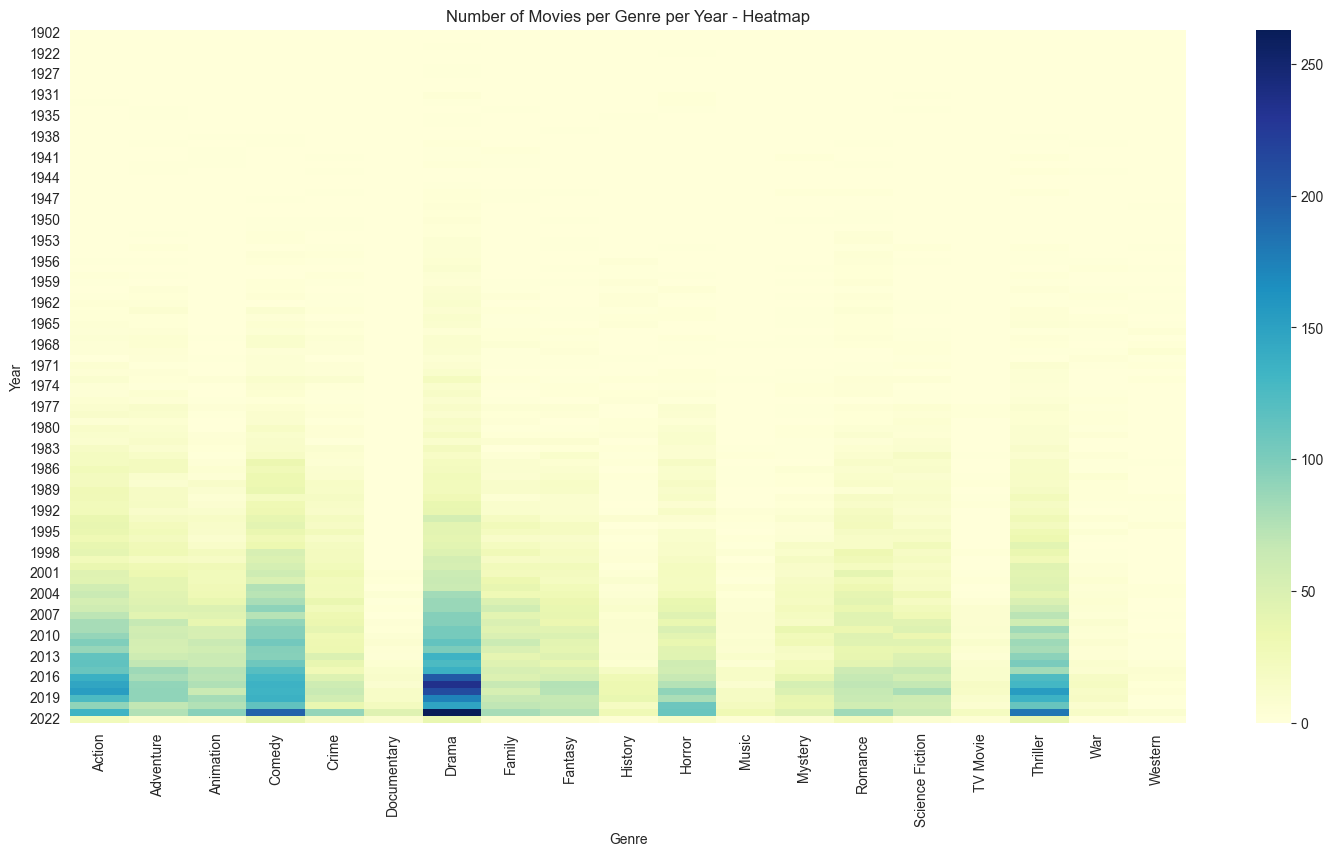

In [57]:
# b) Movies per Genre per Year - Heatmap and Stacked bar chart
genre_year = df.groupby(['Release_Date', 'Genre'], observed=False).size().unstack().fillna(0)

plt.figure(figsize=(18,9))
sns.heatmap(genre_year, cmap='YlGnBu')
plt.title('Number of Movies per Genre per Year - Heatmap')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.show()

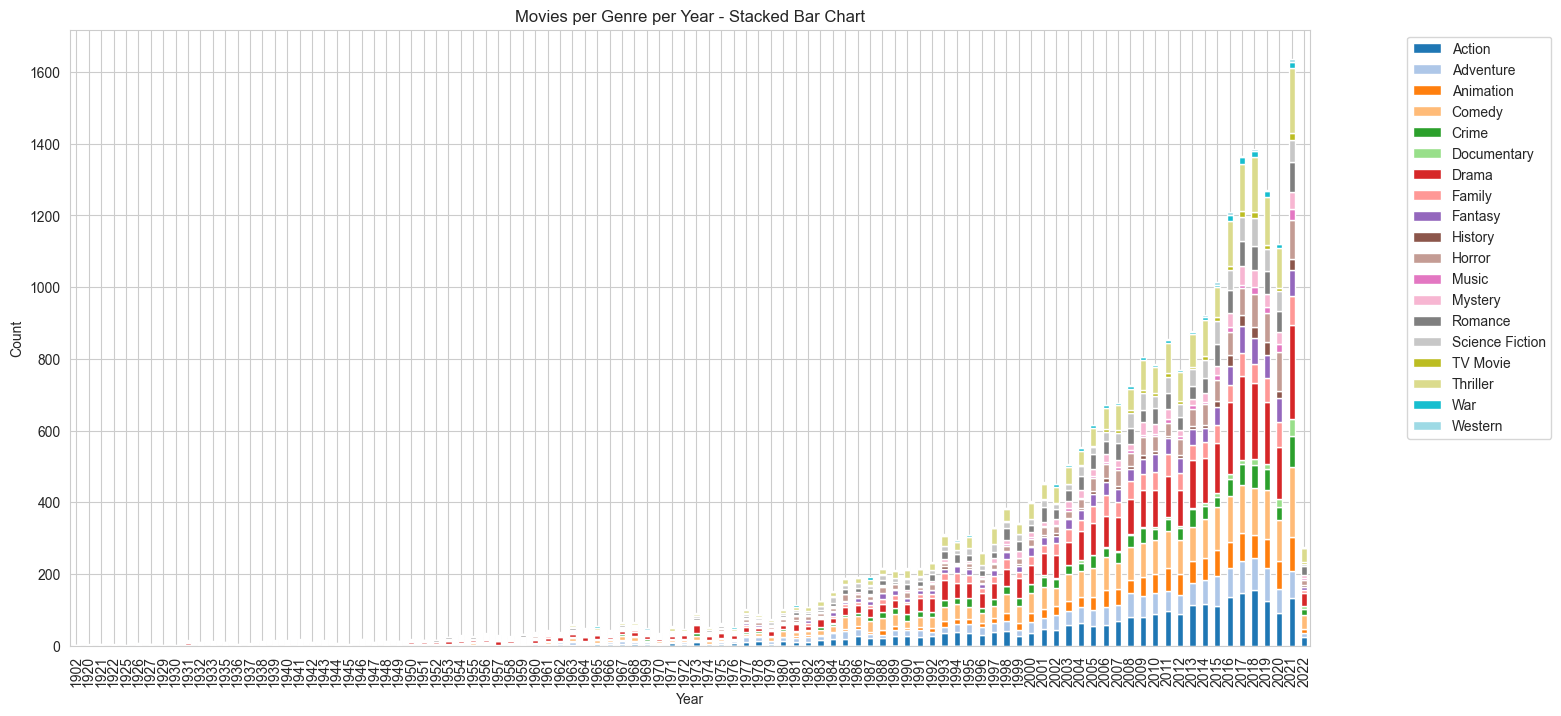

In [56]:

genre_year.plot(kind='bar', stacked=True, figsize=(16,8), colormap='tab20')
plt.title('Movies per Genre per Year - Stacked Bar Chart')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# **c) Genre and Vote_Average**

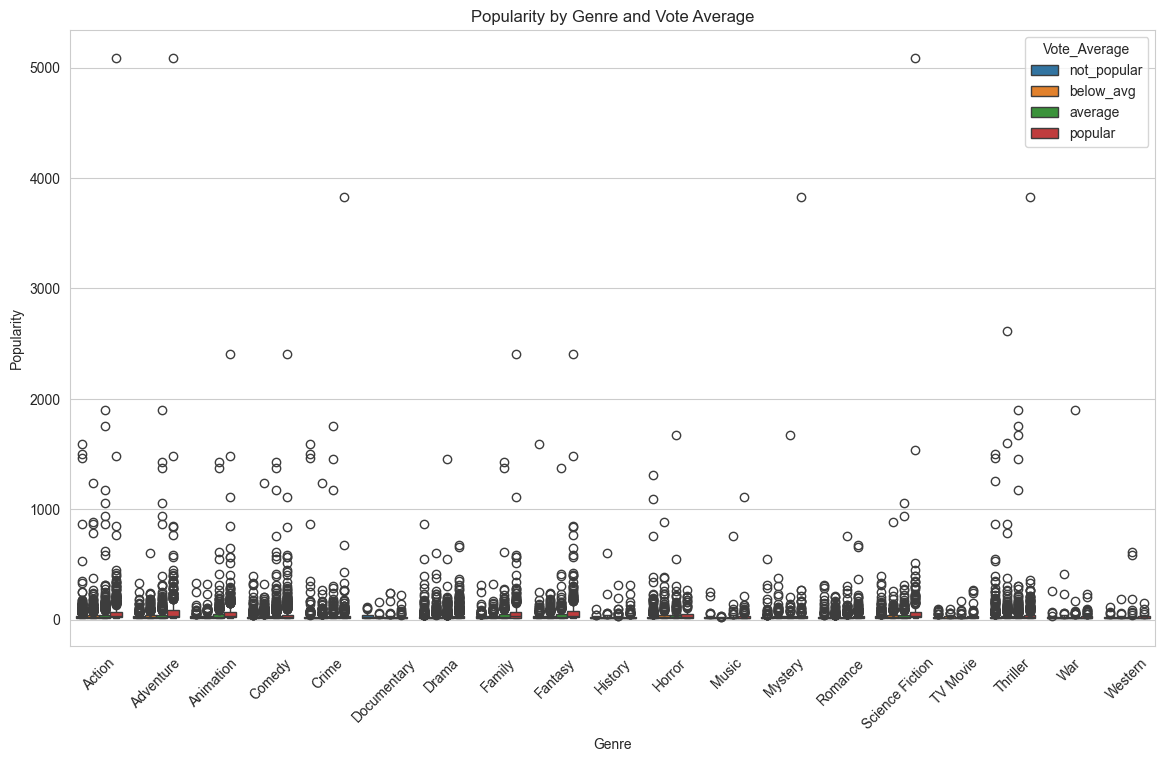

In [58]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Genre', y='Popularity', hue='Vote_Average', data=df)
plt.title('Popularity by Genre and Vote Average')
plt.xticks(rotation=45)
plt.show()

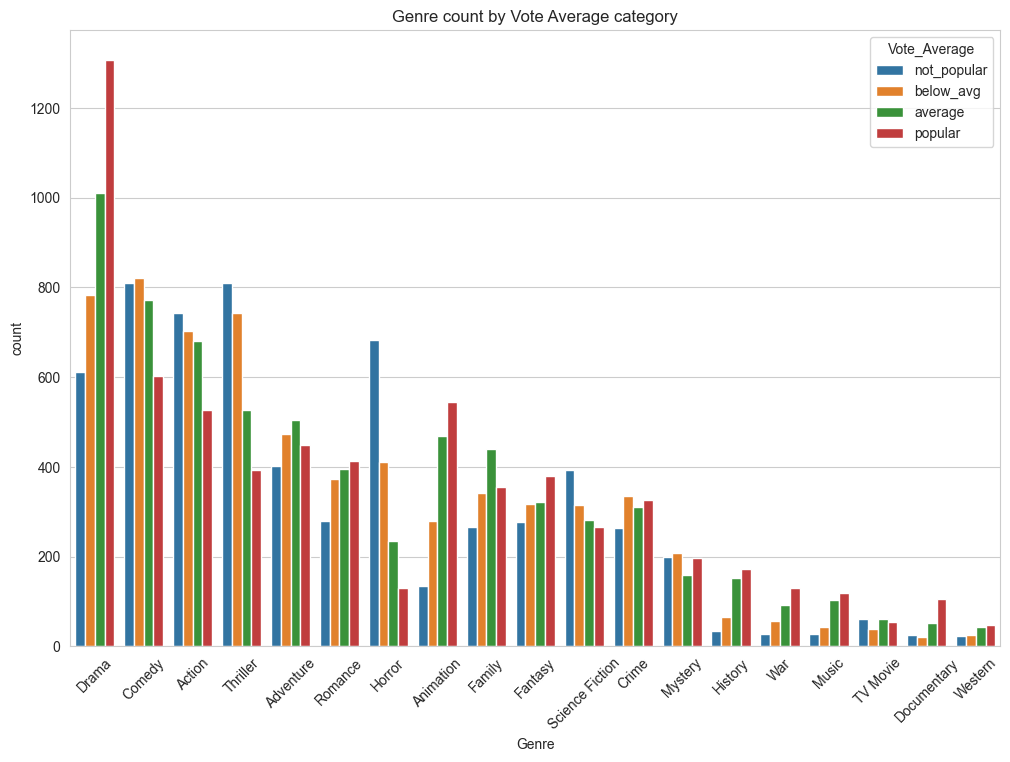

In [59]:
plt.figure(figsize=(12,8))
sns.countplot(x='Genre', hue='Vote_Average', data=df,
              order=df['Genre'].value_counts().index)
plt.title('Genre count by Vote Average category')
plt.xticks(rotation=45)
plt.show()

# **3. Multivariate Analysis**

**a) Genre, Year, and Popularity Facet Grid**

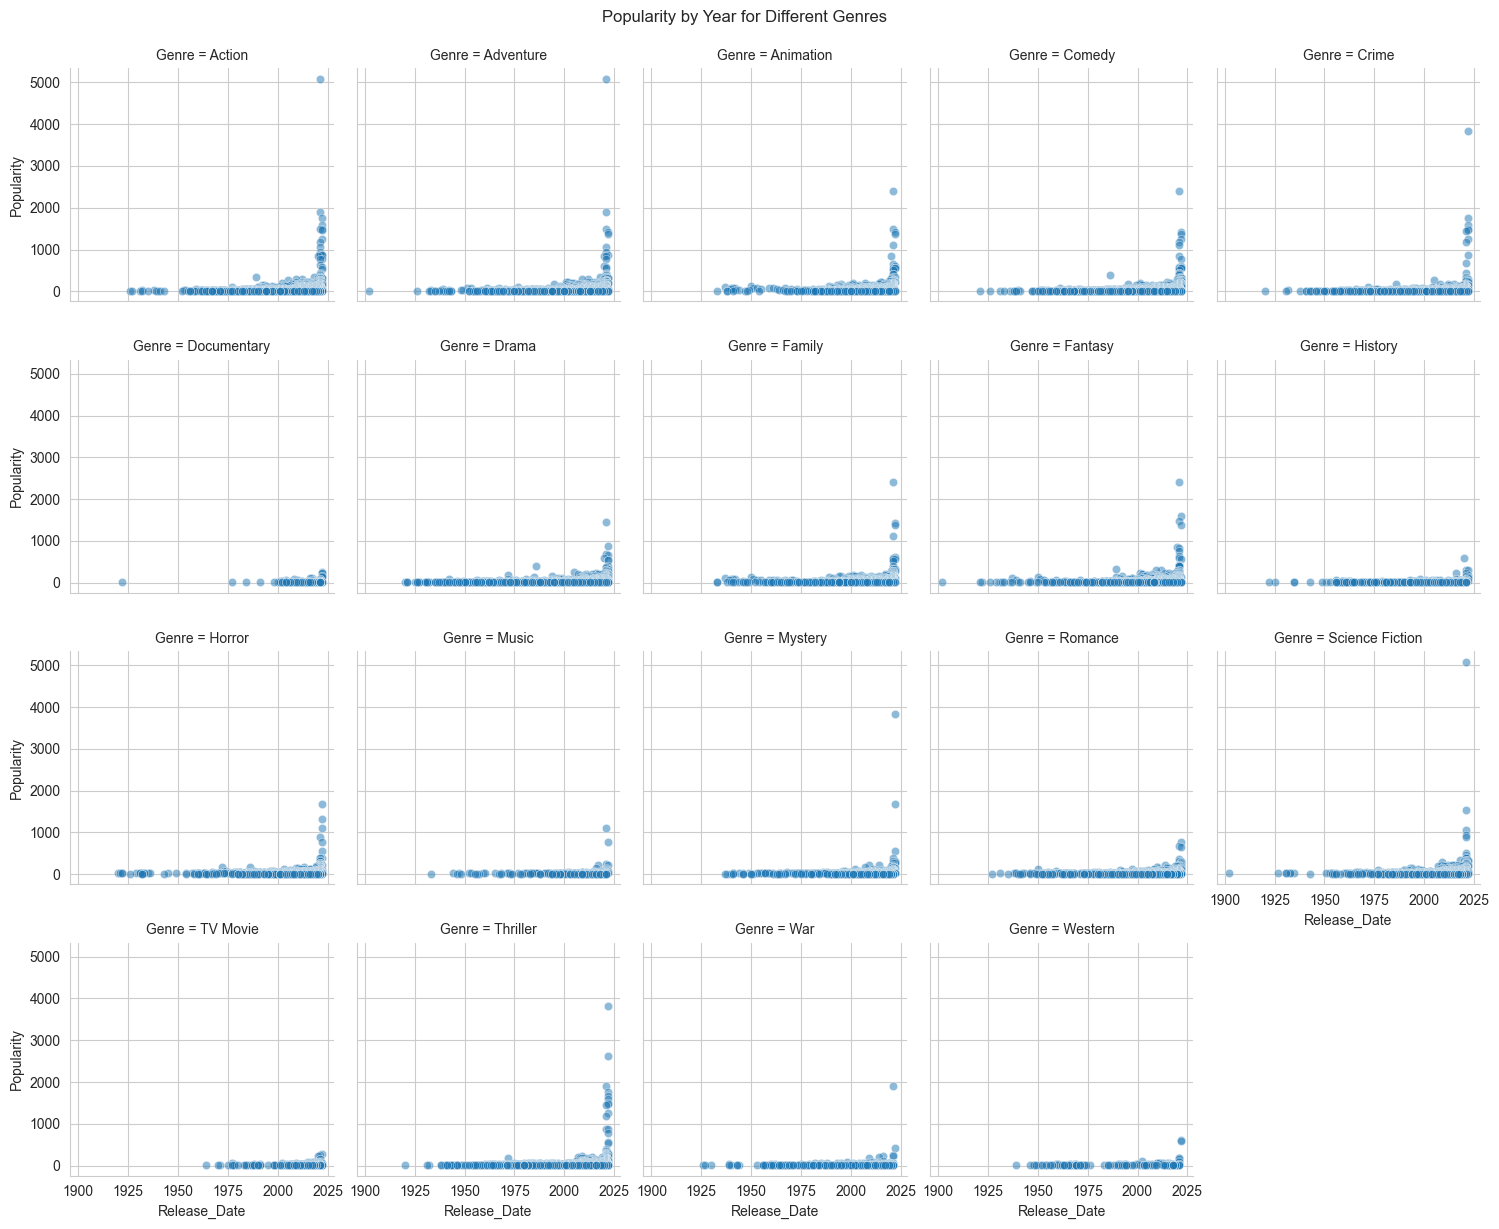

In [60]:
g = sns.FacetGrid(df, col='Genre', col_wrap=5, height=3)
g.map(sns.scatterplot, 'Release_Date', 'Popularity', alpha=0.5)
g.fig.suptitle('Popularity by Year for Different Genres', y=1.02)
plt.show()

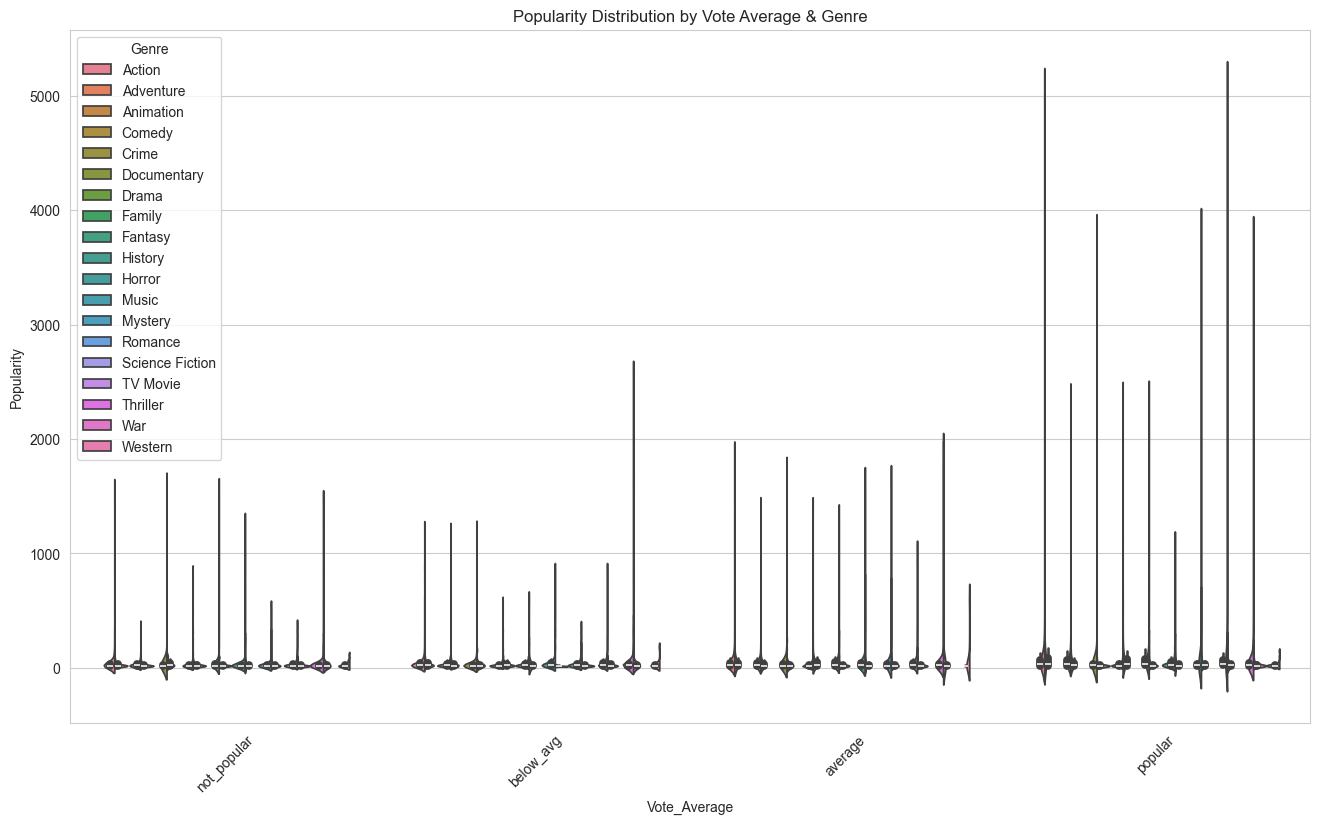

In [61]:
# b) Vote_Average vs Popularity per Genre - Violin Plot
plt.figure(figsize=(16,9))
sns.violinplot(x='Vote_Average', y='Popularity', hue='Genre', data=df, split=True)
plt.title('Popularity Distribution by Vote Average & Genre')
plt.xticks(rotation=45)
plt.show()

# **4. Specialized Visualizations**

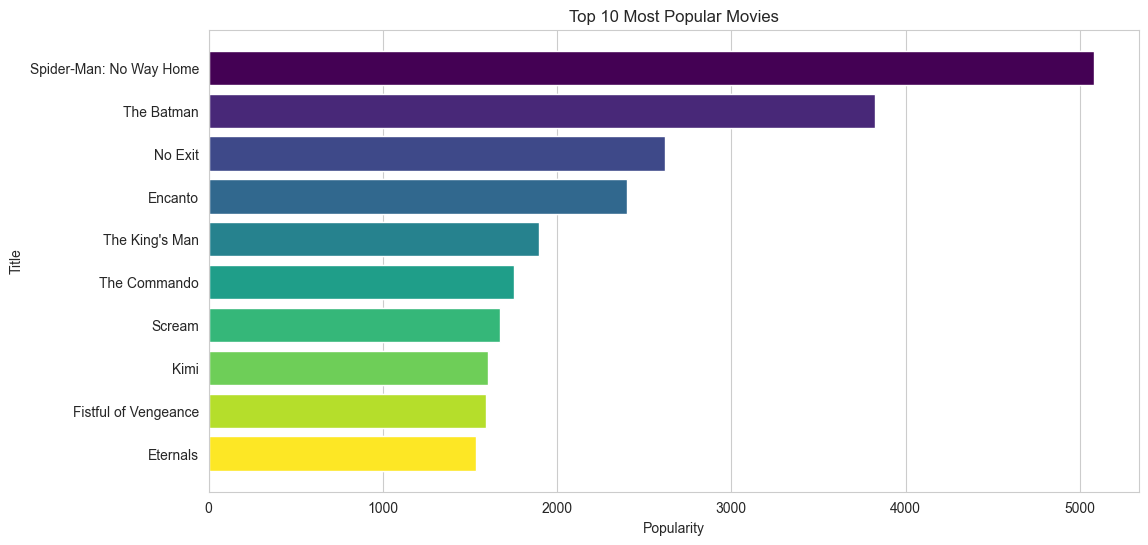

In [65]:
# a) Top 10 Most Popular Movies
import matplotlib.cm as cm
top10 = df.groupby('Title')['Popularity'].max().sort_values(ascending=False).head(10)
colors = cm.viridis(np.linspace(0, 1, len(top10)))

plt.figure(figsize=(12,6))
sns.barplot(x=top10.values, y=top10.index, color=None)  # color will be ignored by sns.barplot for multiple bars, better to use matplotlib directly
bars = plt.barh(top10.index, top10.values, color=colors)
plt.xlabel('Popularity')
plt.title('Top 10 Most Popular Movies')
plt.show()


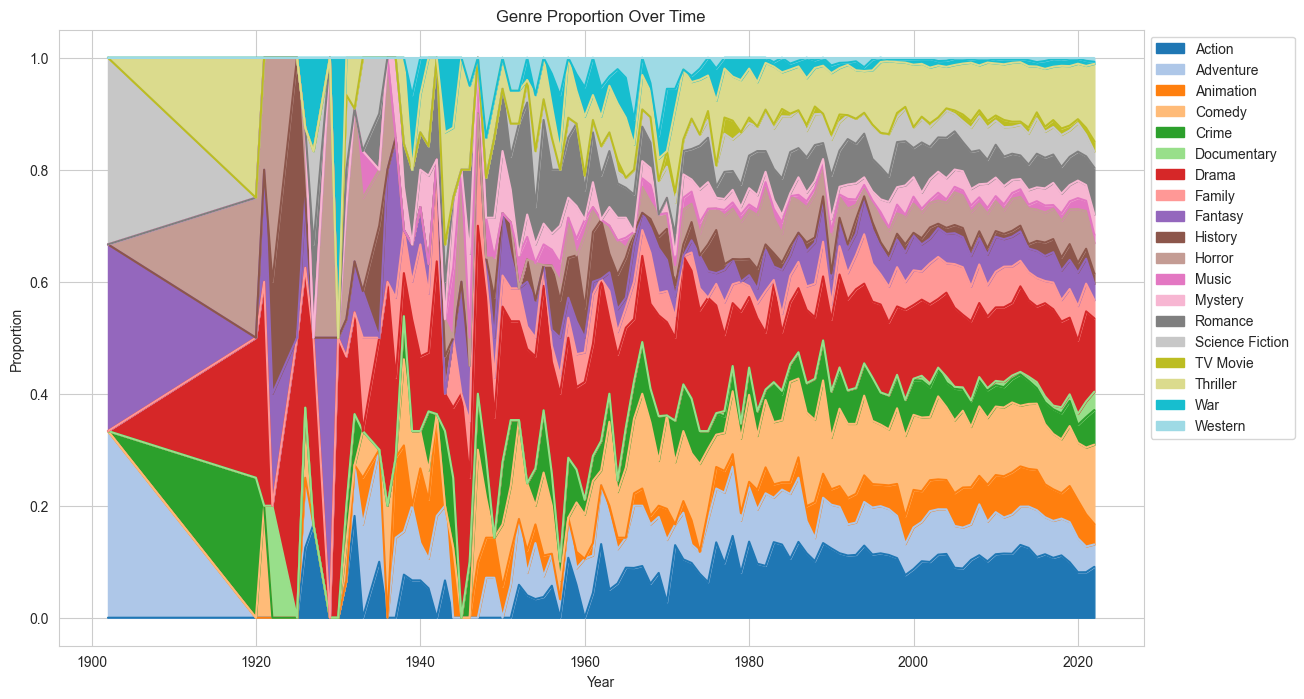

In [66]:
# b) Top Genres Over Time - Area Chart
genre_year_percent = genre_year.div(genre_year.sum(axis=1), axis=0)
genre_year_percent.plot.area(figsize=(14,8), colormap='tab20')
plt.title('Genre Proportion Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

# **5. Descriptive and Statistical Summaries**

In [69]:
# Descriptive statistics by Genre
desc_stats = df.groupby('Genre')[['Popularity', 'Vote_Count']].describe()
print("Descriptive Statistics by Genre:\n", desc_stats)

# Descriptive statistics by Release_Date (year)
year_stats = df.groupby('Release_Date')[['Popularity', 'Vote_Count']].describe()
print("Descriptive Statistics by Year:\n", year_stats)

C:\Users\OM\AppData\Local\Temp\ipykernel_119580\243907543.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desc_stats = df.groupby('Genre')[['Popularity', 'Vote_Count']].describe()


Descriptive Statistics by Genre:
                 Popularity                                                    \
                     count       mean         std     min       25%      50%   
Genre                                                                          
Action              2652.0  50.688837  145.091141  13.359  17.55025  24.3745   
Adventure           1829.0  53.785530  155.810085  13.359  17.75200  25.4600   
Animation           1426.0  52.449432  111.411007  13.360  18.60900  27.4270   
Comedy              3006.0  37.834018   83.454501  13.365  15.91600  20.5760   
Crime               1235.0  44.625692  159.755173  13.357  16.03150  19.9160   
Documentary          203.0  29.737700   34.212768  13.393  15.19750  19.1340   
Drama               3715.0  30.110546   46.304326  13.354  15.49000  19.0920   
Family              1405.0  46.458322  100.410792  13.357  17.50400  24.9320   
Fantasy             1295.0  52.986726  117.057564  13.357  17.89800  25.8880   
Histor

# **6. Advanced Exploration**

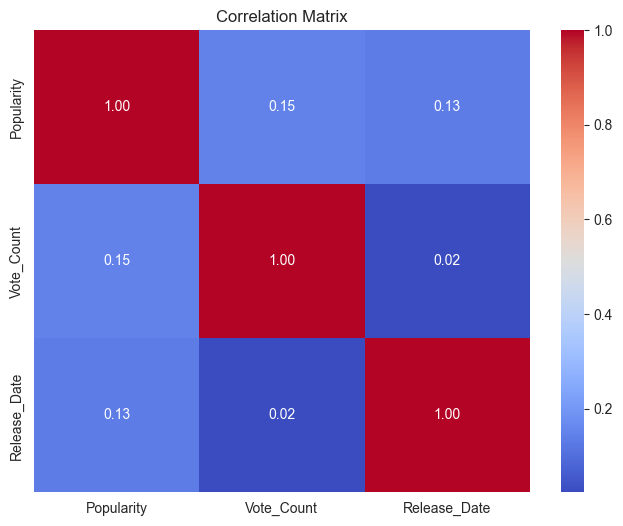

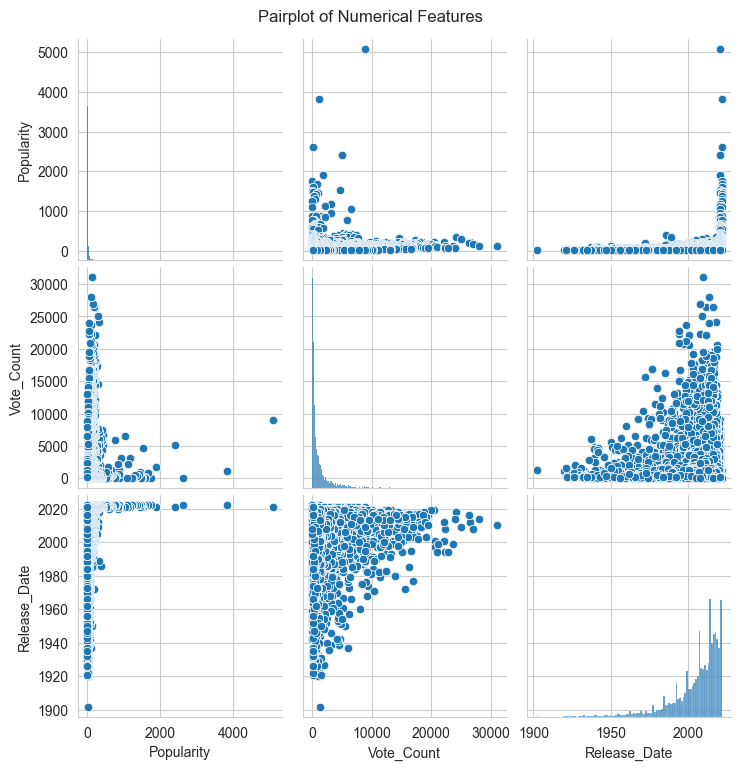

In [70]:
# Correlation Matrix
plt.figure(figsize=(8,6))
corr = df[['Popularity', 'Vote_Count', 'Release_Date']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pairplot of numerical columns
sns.pairplot(df[['Popularity', 'Vote_Count', 'Release_Date']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# **Conclusion**

# The most frequent genre in the dataset

- Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

# Genres that has highest votes

- We have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities.

# Movie that got the highest popularity and it's genre.

- Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action , Adventure and Sience Fiction .

# Movie that got the lowest popularity and its genre.

- The united states, thread' has the highest lowest rate in our dataset and it has genres of music , drama , 'war', 'sci-fi' and history`.

# Year that has the most filmmed movies.

- Year 2020 has the highest filmming rate in our dataset.